<a href="https://colab.research.google.com/github/shehraan/Stock-Predictor/blob/main/Shehraan_stock_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries and datasets


In [ ]:
!pip install quandl

import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## Get the stock picked by user


In [ ]:
stock = input("Name a stock to predict the price of: ")

Name a stock to predict the price of: TATAGLOBAL


In [ ]:
exchange = input("State the acryonyms of the stock exchange platform which has this stock: ")

State the acryonyms of the stock exchange platform which has this stock: NSE


In [ ]:
df = quandl.get(str(exchange)+'/'+str(stock), authtoken='QVRCMqddvV-2aF5nFQnz')
df.head() #Render the data for the top 5 stock

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


## Show the data

In [ ]:
df.shape #Render the number of rows and columns

(2100, 7)

In [ ]:
df.describe() #Describe the data

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595,2.327641e+06,3919.237300
std,49.350352,50.127368,48.597083,49.420366,49.401844,2.081348e+06,4547.900775
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.750000,122.675000,119.000000,120.600000,120.550000,1.147086e+06,1462.815000
50%,142.250000,144.300000,140.425000,142.000000,141.950000,1.768579e+06,2552.165000
75%,159.000000,161.500000,156.825000,158.712500,158.762500,2.795726e+06,4548.082500
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


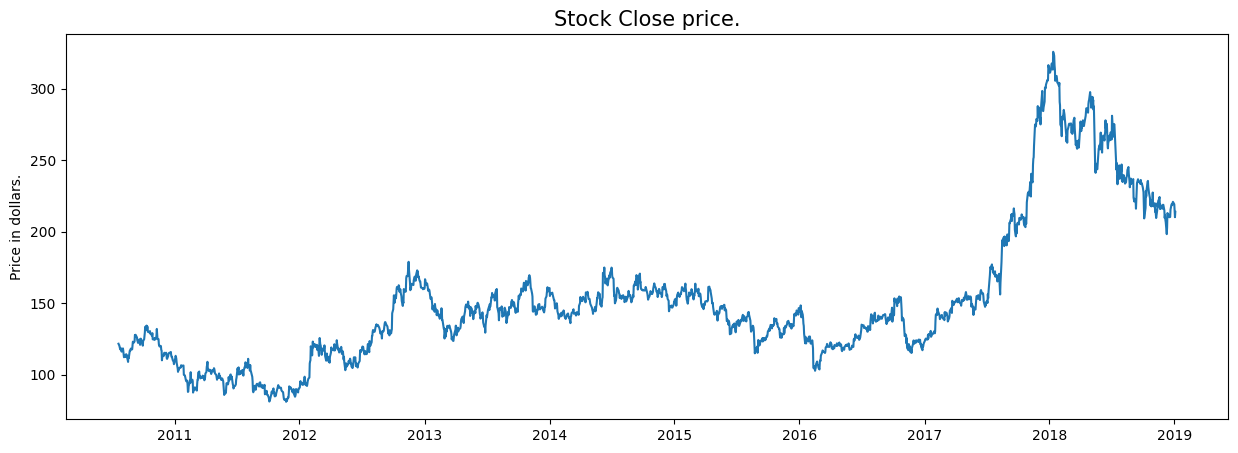

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Stock Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()
df.reset_index(level=0, inplace=True)

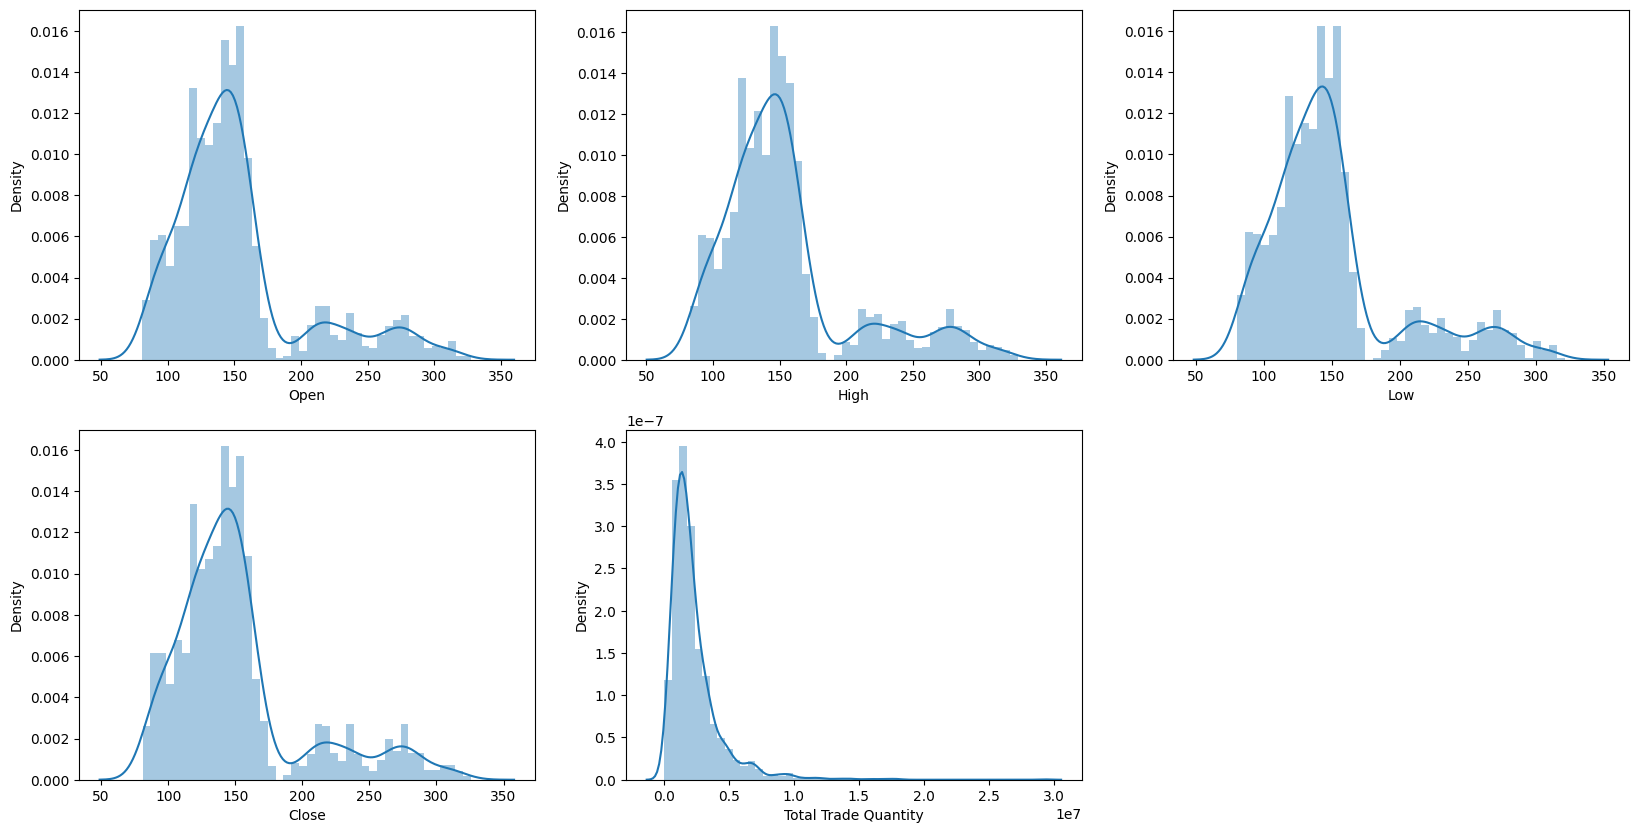

In [ ]:
features = ['Open', 'High', 'Low', 'Close', 'Total Trade Quantity']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

In [ ]:
df['Date'] = df['Date'].astype(str)
splitted = df['Date'].str.split('-', expand=True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56,21,7,2010
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17,22,7,2010
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31,23,7,2010
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01,26,7,2010
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98,27,7,2010


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year,is_quarter_end
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56,21,7,2010,0
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17,22,7,2010,0
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31,23,7,2010,0
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01,26,7,2010,0
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98,27,7,2010,0


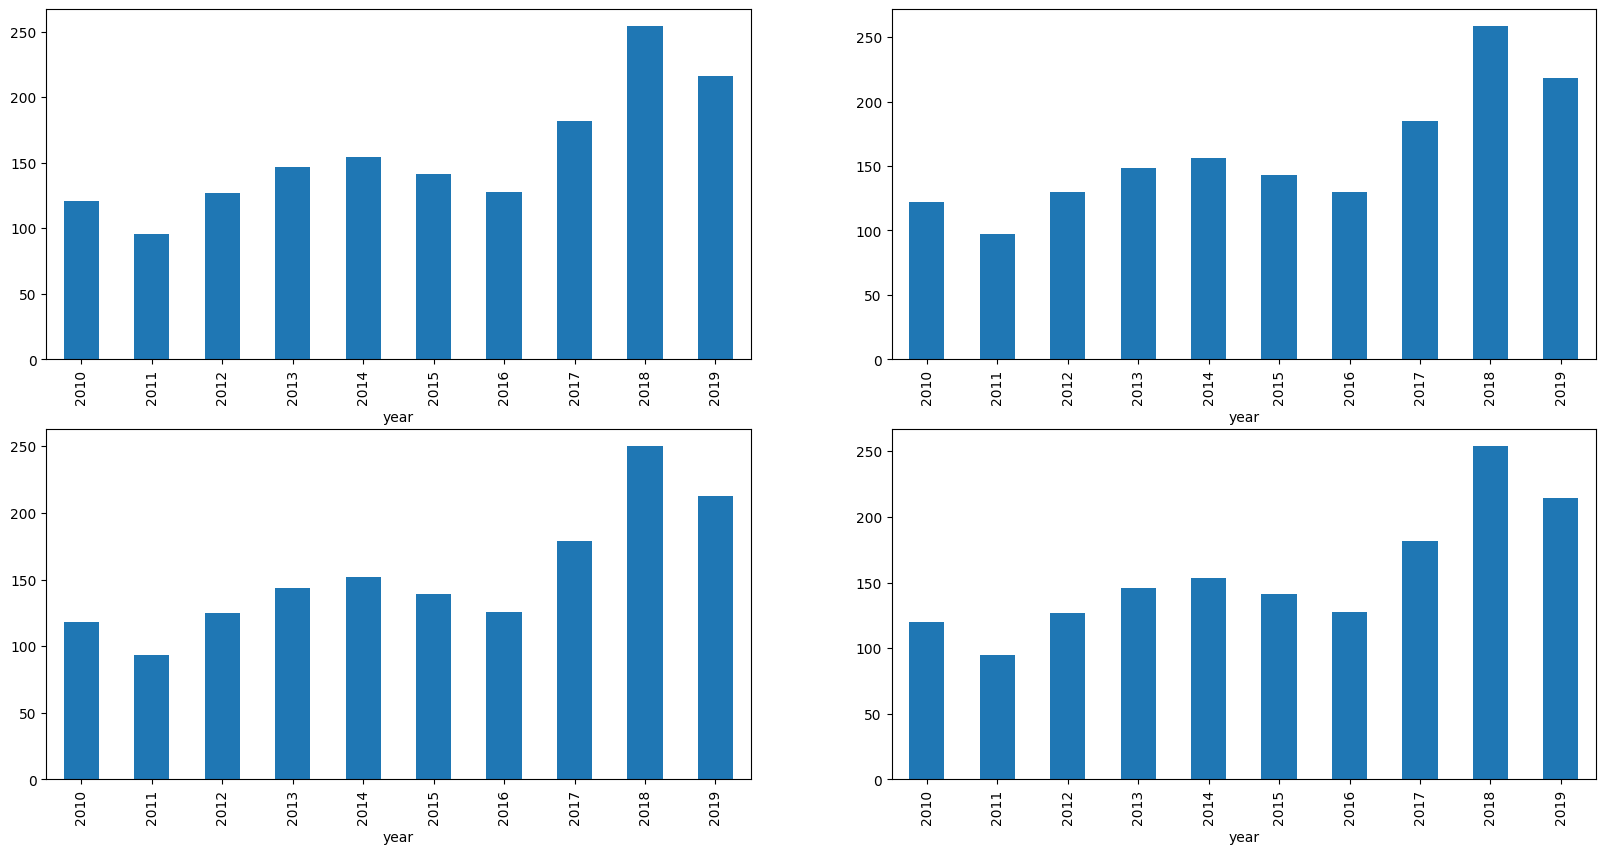

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [ ]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year
is_quarter_end,,,,,,,,,,
0,152.498275,154.861395,149.955248,152.230697,152.191840,2.382859e+06,4010.173436,15.820273,6.138749,2014.284687
1,150.485755,152.740056,148.196968,150.317489,150.325106,2.219308e+06,3740.828039,15.726375,7.679831,2014.198872


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0) #target for whether to buy or not

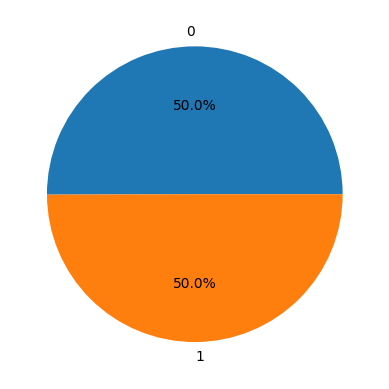

In [ ]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show() #check whether the target is balanced or not using a pie chart.

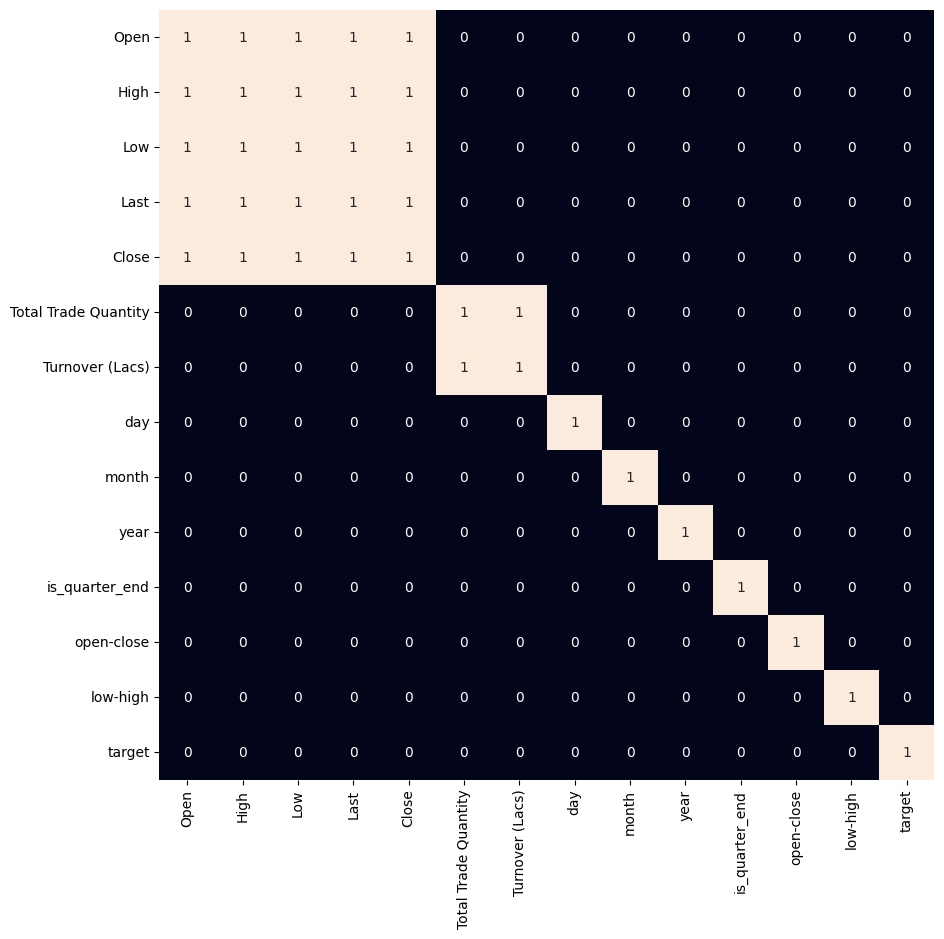

In [ ]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features) #Normalizing the data

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
#Splitting our data into testing and training parts
print(X_train.shape, X_valid.shape)

(1890, 3) (210, 3)


#### Find the best parameteres to run model on

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 500, 1000],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the models
model = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, Y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

KeyboardInterrupt: ignored

##Train our model to predict the stock prices

In [ ]:
#best code
# Initialize the models with the best parameters
model = XGBClassifier(
    colsample_bytree=1, #optimized
    gamma=0.7, #optimized
    learning_rate=0.99, #optimized
    max_depth=1000, #unchangable
    min_child_weight=10, #optimized
    subsample=0.6 #optimized
)

# For XGBClassifier, use early stopping to prevent overfitting
model.fit(X_train, Y_train, early_stopping_rounds=10, eval_set=[(X_valid, Y_valid)], verbose=False)

print(f'{model} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:,1]))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.7, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.99, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1000,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.6788826914484654
Validation Accuracy :  0.6020334059549746


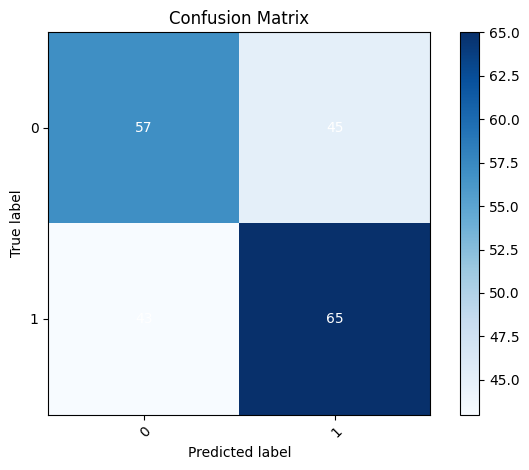

In [ ]:
# Assuming that models[0] is a trained model
y_pred = model.predict(X_valid)

# Compute the confusion matrix
cm = confusion_matrix(Y_valid, y_pred)

# Only use the labels that appear in the data
classes = unique_labels(Y_valid, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()